In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [ ]:
Dataset = pd.read_csv('/Users/kxng/Documents/Python/Myproject/marketing-sales-performance-analysis/data/shopping_behavior_updated.csv')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [132]:
print(f"SHAPE : {Dataset.shape}")
print(f"COLUMNS : {Dataset.columns.tolist()}")
print(f"Data Types :\n{Dataset.dtypes}")
print(f"Missing Values : \n{Dataset.isnull().sum()}")


SHAPE : (3900, 18)
COLUMNS : ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']
Data Types :
Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object
Missing Values : 
Customer ID              

In [133]:
#statistical Summary for numeric colums
numeric_clos = ['Age','Purchase Amount (USD)','Previous Purchases','Frequency of Purchases','Review Rating']
print("statistical Summary (Numeric Features) :")
print(Dataset[numeric_clos].describe())

statistical Summary (Numeric Features) :
               Age  Purchase Amount (USD)  Previous Purchases  Review Rating
count  3900.000000            3900.000000         3900.000000    3900.000000
mean     44.068462              59.764359           25.351538       3.749949
std      15.207589              23.685392           14.447125       0.716223
min      18.000000              20.000000            1.000000       2.500000
25%      31.000000              39.000000           13.000000       3.100000
50%      44.000000              60.000000           25.000000       3.700000
75%      57.000000              81.000000           38.000000       4.400000
max      70.000000             100.000000           50.000000       5.000000


In [134]:
# Unique values for key categorical features
categorical_cols = ["Gender", "Item Purchased", "Category", "Location", "Size", "Color", 
                    "Season", "Subscription Status", "Shipping Type", "Discount Applied", 
                    "Promo Code Used", "Payment Method"]
print("\nUnique Values (Categorical Columns):")
for col in categorical_cols:
    print(f"{col}: { Dataset[col].unique()[:5] }")  # display first 5 unique values


Unique Values (Categorical Columns):
Gender: ['Male' 'Female']
Item Purchased: ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers']
Category: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']
Location: ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon']
Size: ['L' 'S' 'M' 'XL']
Color: ['Gray' 'Maroon' 'Turquoise' 'White' 'Charcoal']
Season: ['Winter' 'Spring' 'Summer' 'Fall']
Subscription Status: ['Yes' 'No']
Shipping Type: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping']
Discount Applied: ['Yes' 'No']
Promo Code Used: ['Yes' 'No']
Payment Method: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer']


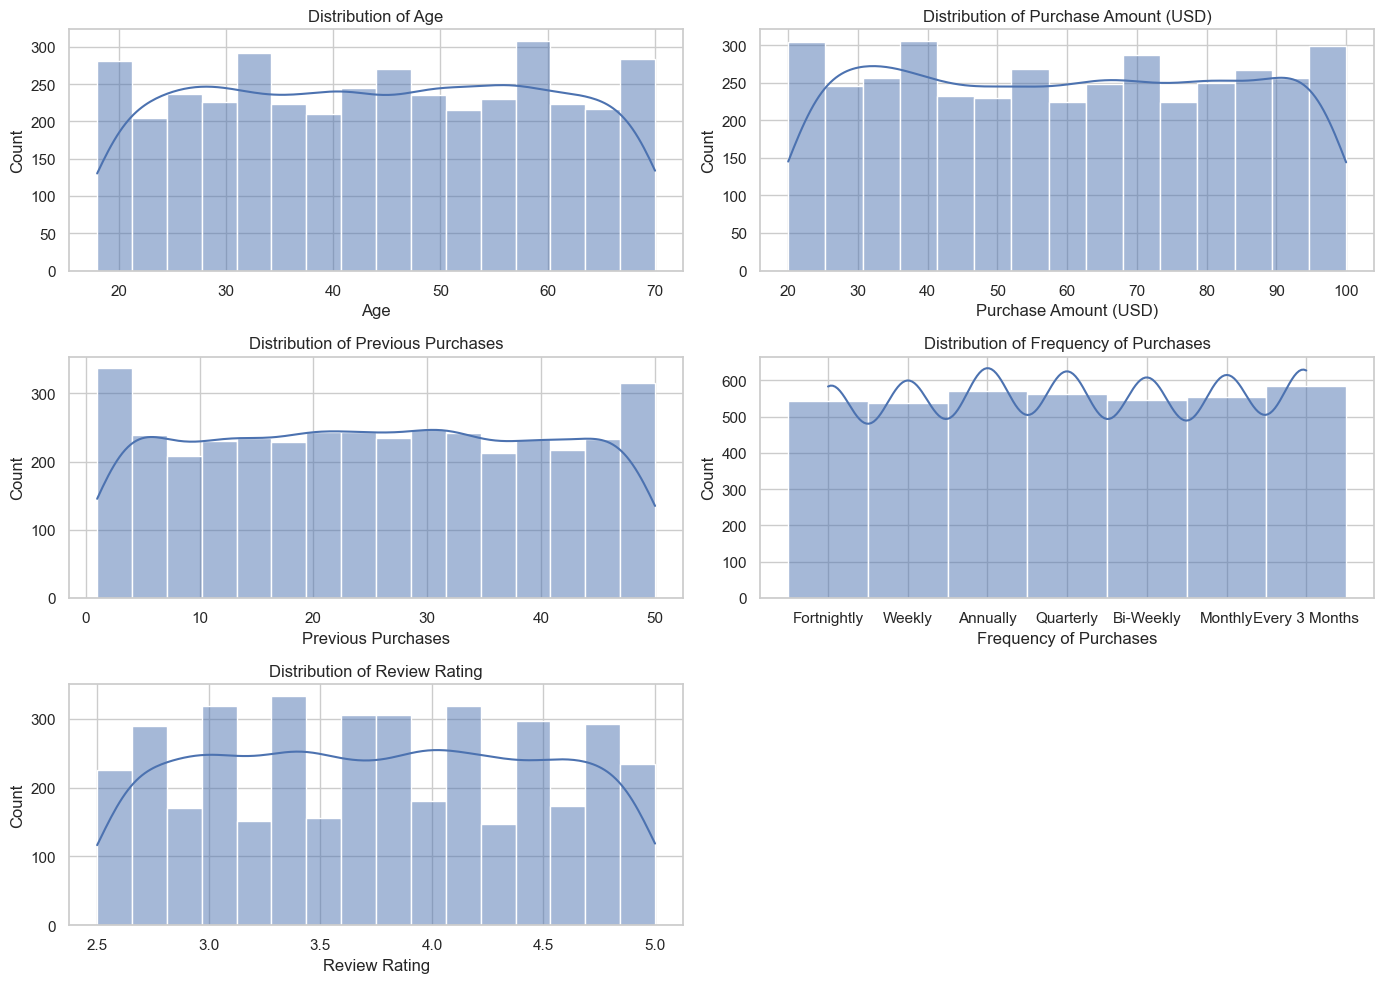

In [135]:
# 1. Distribution of Numeric Features
numeric_cols = ["Age", "Purchase Amount (USD)", "Previous Purchases", "Frequency of Purchases", "Review Rating"]

plt.figure(figsize=(14,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(Dataset[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()



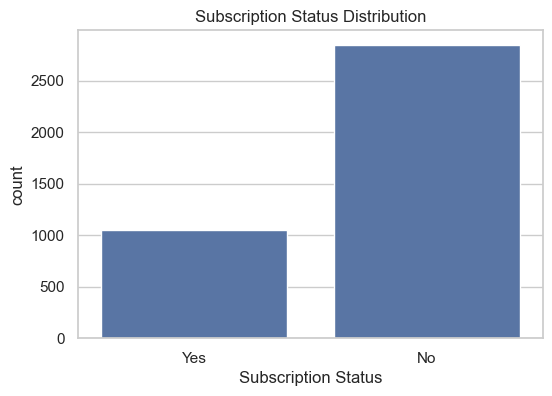

In [136]:
# 2. Subscription Status Counts
plt.figure(figsize=(6,4))
sns.countplot(x="Subscription Status", data=Dataset)
plt.title("Subscription Status Distribution")
plt.show()

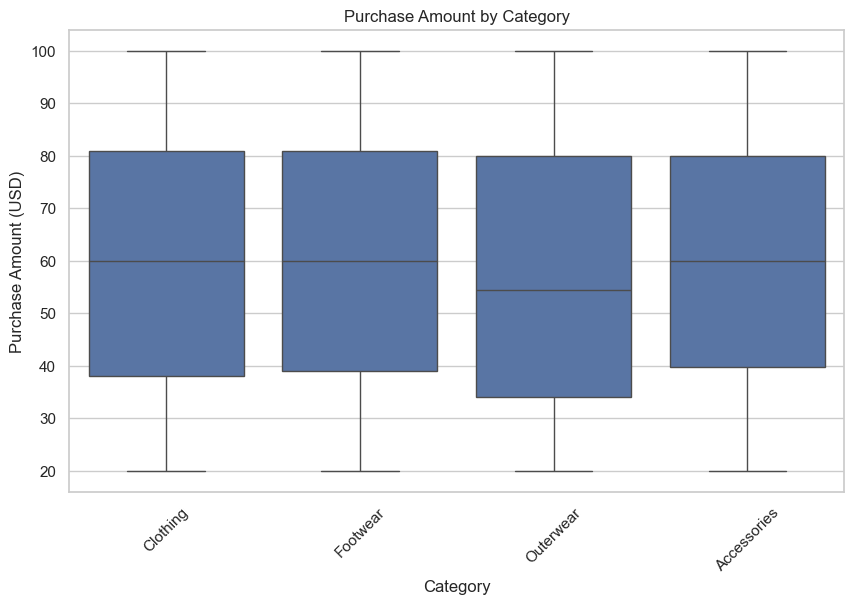

In [137]:
# 3. Purchase Amount by Category
plt.figure(figsize=(10,6))
sns.boxplot(x="Category", y="Purchase Amount (USD)", data=Dataset)
plt.title("Purchase Amount by Category")
plt.xticks(rotation=45)
plt.show()

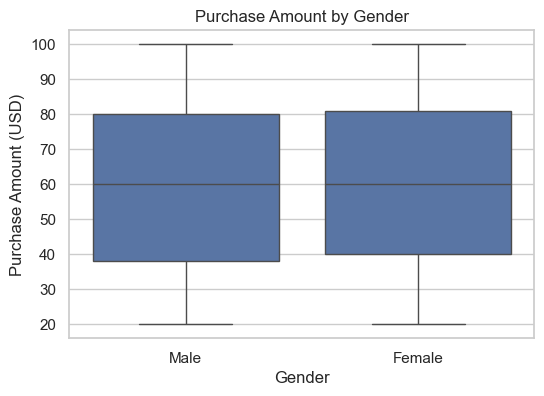

In [138]:
# 4. Gender vs Purchase Amount
plt.figure(figsize=(6,4))
sns.boxplot(x="Gender", y="Purchase Amount (USD)", data=Dataset)
plt.title("Purchase Amount by Gender")
plt.show()



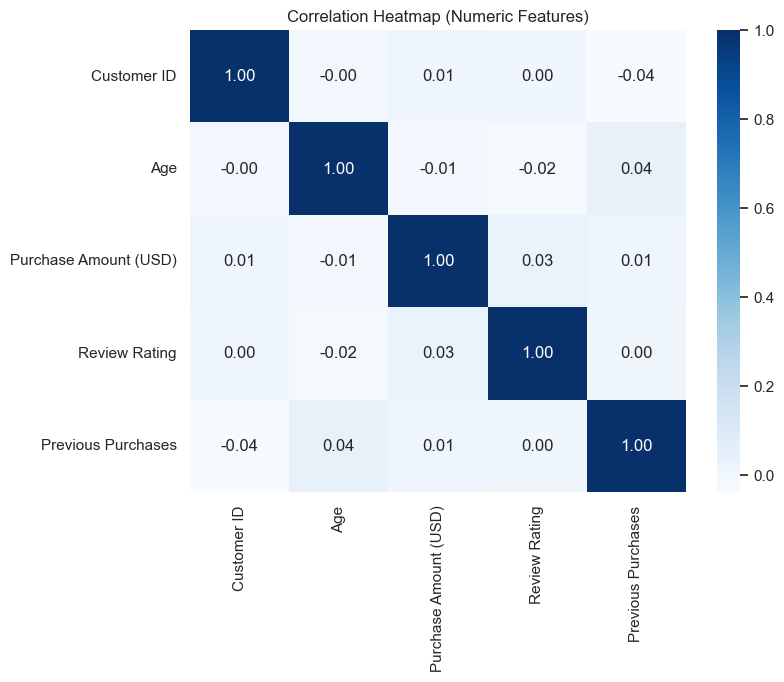

In [139]:
# 5. Correlation Heatmap (Numeric Features) — Corrected
# Select only numeric columns
numeric_cols = Dataset.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(8,6))
sns.heatmap(Dataset[numeric_cols].corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [140]:
Dataset_porcessed = Dataset.copy()
# 1. Encode Categorical Features
# List of categorical columns to encode
categorical_cols = ["Gender", "Item Purchased", "Category", "Location", "Size", "Color",
                    "Season", "Subscription Status", "Shipping Type", "Discount Applied",
                    "Promo Code Used", "Payment Method", "Frequency of Purchases"]

# Encode using LabelEncoder
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    Dataset_porcessed[col] = le.fit_transform(Dataset_porcessed[col].astype(str))
    le_dict[col] = le  # save encoder for future inverse transform if needed

In [141]:
# 2. Define Features & Targets
# Regression target → Purchase Amount
X_reg = Dataset_porcessed.drop(["Purchase Amount (USD)", "Subscription Status", "Review Rating"], axis=1)
y_reg = Dataset_porcessed["Purchase Amount (USD)"]

# Classification target → Subscription Status
X_clf = Dataset_porcessed.drop(["Subscription Status", "Purchase Amount (USD)", "Review Rating"], axis=1)
y_clf = Dataset_porcessed["Subscription Status"]

In [142]:
# 3. Train-Test Splits
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)


In [143]:
# 4. Scaling
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# Classification (tree models) scaling optional
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

print("Preprocessing completed successfully.")

Preprocessing completed successfully.


In [144]:
# Helper function for evaluation
def evaluate_regression(model, X_test, y_test, model_name="Model"):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    print(f"\n📌 {model_name} Performance:")
    print(f"MAE : {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²  : {r2:.3f}")
    
    return preds

In [145]:
# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_reg_scaled, y_train_reg)

lr_preds = evaluate_regression(lr, X_test_reg_scaled, y_test_reg, "Linear Regression")



📌 Linear Regression Performance:
MAE : 20.824
RMSE: 23.859
R²  : -0.017


In [146]:
# 2. Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)
rf.fit(X_train_reg, y_train_reg)  # No scaling required

rf_preds = evaluate_regression(rf, X_test_reg, y_test_reg, "Random Forest Regressor")




📌 Random Forest Regressor Performance:
MAE : 20.803
RMSE: 23.884
R²  : -0.019


In [147]:
# 3. XGBoost Regressor
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train_reg, y_train_reg)

xgb_preds = evaluate_regression(xgb, X_test_reg, y_test_reg, "XGBoost Regressor")

print("\nRegression modeling completed.")



📌 XGBoost Regressor Performance:
MAE : 21.103
RMSE: 24.785
R²  : -0.098

Regression modeling completed.


In [148]:
# Helper evaluation function

def evaluate_classification(model, X_test, y_test, model_name="Model"):
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    print(f"\n📌 {model_name} Performance:")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1 Score : {f1:.3f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, preds))

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    return preds
    


📌 Logistic Regression Performance:
Accuracy : 0.996
Precision: 0.991
Recall   : 0.995
F1 Score : 0.993

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       558
           1       0.99      1.00      0.99       222

    accuracy                           1.00       780
   macro avg       0.99      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



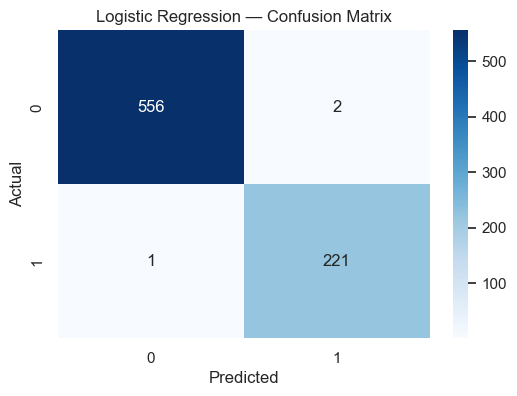

In [149]:
# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf_scaled, y_train_clf)

logreg_preds = evaluate_classification(log_reg, X_test_clf_scaled, y_test_clf, "Logistic Regression")


📌 Random Forest Classifier Performance:
Accuracy : 1.000
Precision: 1.000
Recall   : 1.000
F1 Score : 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       558
           1       1.00      1.00      1.00       222

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



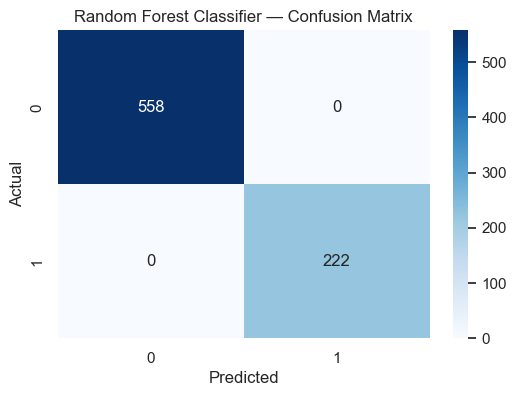

In [150]:
# 2. Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)
rf_clf.fit(X_train_clf, y_train_clf)  # No scaling required

rf_clf_preds = evaluate_classification(rf_clf, X_test_clf, y_test_clf, "Random Forest Classifier")



📌 XGBoost Classifier Performance:
Accuracy : 0.999
Precision: 1.000
Recall   : 0.995
F1 Score : 0.998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       558
           1       1.00      1.00      1.00       222

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



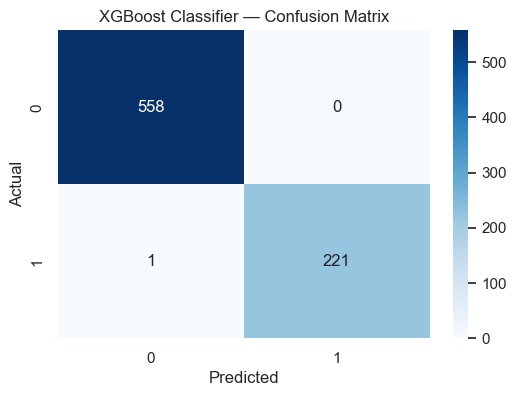


Classification modeling completed.


In [151]:
# 3. XGBoost Classifier
xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)
xgb_clf.fit(X_train_clf, y_train_clf)

xgb_clf_preds = evaluate_classification(xgb_clf, X_test_clf, y_test_clf, "XGBoost Classifier")

print("\nClassification modeling completed.")


In [152]:
# 1. Top 10 Items Purchased
top_items = Dataset["Item Purchased"].value_counts().head(10)
print("📌 Top 10 Items Purchased:")
for item, count in top_items.items():
    print(f"{item}: {count} purchases")


📌 Top 10 Items Purchased:
Blouse: 171 purchases
Jewelry: 171 purchases
Pants: 171 purchases
Shirt: 169 purchases
Dress: 166 purchases
Sweater: 164 purchases
Jacket: 163 purchases
Belt: 161 purchases
Sunglasses: 161 purchases
Coat: 161 purchases


In [153]:
# 2. Top 10 Categories Purchased
top_categories = Dataset["Category"].value_counts().head(10)
print("\n📌 Top 10 Categories Purchased:")
for cat, count in top_categories.items():
    print(f"{cat}: {count} purchases")




📌 Top 10 Categories Purchased:
Clothing: 1737 purchases
Accessories: 1240 purchases
Footwear: 599 purchases
Outerwear: 324 purchases


In [154]:
# 3. Top 10 Locations by Purchase Count
top_locations = Dataset["Location"].value_counts().head(10)
print("\n📌 Top 10 Locations by Purchase Count:")
for loc, count in top_locations.items():
    print(f"{loc}: {count} purchases")




📌 Top 10 Locations by Purchase Count:
Montana: 96 purchases
California: 95 purchases
Idaho: 93 purchases
Illinois: 92 purchases
Alabama: 89 purchases
Minnesota: 88 purchases
Nebraska: 87 purchases
New York: 87 purchases
Nevada: 87 purchases
Maryland: 86 purchases


In [155]:
# 4. Feature Importance (Random Forest - Subscription Status)
rf_importances = rf_clf.feature_importances_
features = X_train_clf.columns
feature_importance_list = sorted(zip(features, rf_importances), key=lambda x: x[1], reverse=True)

print("\n📌 Top Features for Subscription Status (Random Forest):")
for feat, score in feature_importance_list[:10]:
    print(f"{feat}: Importance Score = {score:.4f}")



📌 Top Features for Subscription Status (Random Forest):
Customer ID: Importance Score = 0.6288
Discount Applied: Importance Score = 0.1556
Promo Code Used: Importance Score = 0.1333
Gender: Importance Score = 0.0339
Previous Purchases: Importance Score = 0.0074
Age: Importance Score = 0.0069
Location: Importance Score = 0.0062
Item Purchased: Importance Score = 0.0059
Color: Importance Score = 0.0051
Frequency of Purchases: Importance Score = 0.0036
